# only 국민연금 가입 data

In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [2]:
f1 = "국민연금 가입 사업장 내역_202306.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_3036\3189695905.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [3]:
pensionDF.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2023-05,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,...,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,NaN,NaN,590,281500280,9,2
1,2023-05,신일기업(주),201810,1,4537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,...,1,381002,NaN,1988-01-01,NaN,NaN,18,5976760,0,1
2,2023-05,디에스디엘(주),104811,1,4526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,17,5054060,1,1
3,2023-05,(주)헤럴드,104810,1,4336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,322,124036980,4,4
4,2023-05,연합뉴스(주),102812,1,3143,서울특별시 종로구 수송동,서울특별시 종로구 율곡로2길,1111012400,1111061500,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,853,397177060,15,6


In [4]:
pensionDF.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [5]:
pensionDF['사업장지번상세주소'] = np.where(pensionDF['사업장지번상세주소'].str.strip() != '', pensionDF['사업장지번상세주소'], pensionDF['사업장도로명상세주소'])

In [6]:
pensionDF = pensionDF[["사업장명", "사업장지번상세주소", "가입자수", "당월고지금액"]]

In [7]:
list(pensionDF["사업장지번상세주소"].unique())

['충청남도 아산시 둔포면',
 '서울특별시 중구 충무로2가',
 '서울특별시 중구 남대문로4가',
 '서울특별시 용산구 후암동',
 '서울특별시 종로구 수송동',
 '서울특별시 중구 을지로1가',
 '서울특별시 영등포구 여의도동',
 '서울특별시 금천구 가산동',
 '서울특별시 강남구 대치동',
 '서울특별시 강남구 신사동',
 '서울특별시 중구 소공동',
 '서울특별시 관악구 남현동',
 '서울특별시 중구 중림동',
 '서울특별시 강남구 역삼동',
 '서울특별시 노원구 공릉동',
 '서울특별시 강동구 고덕동',
 '서울특별시 강남구 삼성동',
 '서울특별시 종로구 종로6가',
 '서울특별시 강남구 청담동',
 '서울특별시 마포구 신수동',
 '서울특별시 종로구 종로2가',
 '경기도 여주시 산북면',
 '서울특별시 중구 을지로5가',
 '인천광역시 남동구 고잔동',
 '서울특별시 서초구 반포동',
 '경기도 가평군 가평읍',
 '경기도 과천시 주암동',
 '서울특별시 강서구 마곡동',
 '서울특별시 금천구 독산동',
 '서울특별시 송파구 방이동',
 '서울특별시 강남구 논현동',
 '서울특별시 강동구 둔촌동',
 '서울특별시 광진구 자양동',
 '서울특별시 동대문구 신설동',
 '서울특별시 강동구 강일동',
 '서울특별시 성동구 성수동2가',
 '서울특별시 광진구 중곡동',
 '경기도 광주시 도척면',
 '경상북도 경산시 옥산동',
 '서울특별시 동대문구 용두동',
 '경기도 화성시 팔탄면',
 '서울특별시 동대문구 회기동',
 '경기도 양평군 양평읍',
 '서울특별시 동대문구 장안동',
 '서울특별시 성동구 행당동',
 '서울특별시 중랑구 신내동',
 '서울특별시 동대문구 답십리동',
 '경기도 안산시 단원구 성곡동',
 '경기도 양주시 광적면',
 '서울특별시 동대문구 전농동',
 '서울특별시 서초구 양재동',
 '충청남도 아산시 음봉면',
 '인천광역시 서구 가좌동',
 '서울특별시 강남구 일원동',
 '서울특별시 서초구 서초동',
 '충청남도 아산시

In [8]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

In [9]:
# pensionDF.drop(pensionDF["본사주소"] == " ")

### 주소분리

In [10]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
521426,굴림타코야끼 김포구래점,경기도 김포시 구래동,0,0
478896,주식회사스케치/일용/한탄강 하늘다리 전망대 설치사업,경기도 포천시 관인면,0,0
478903,비오에프테크날리지주식회사,경기도 화성시 영천동,0,0
478906,원동건설주식회사-(일용)상교 하수관로 설치공사 중 상하수도 및 포장공사,경기도 여주시 북내면,0,0
478914,제이에스산업개발주식회사/일용/수지농협 경제사업센터및금융복합시설 신축공사(철근콘크리트공사),경기도 용인시 수지구 고기동,0,0
...,...,...,...,...
154057,엘지디스플레이(주),서울특별시 영등포구 여의도동,28558,12861594420
138296,에스케이하이닉스 주식회사,경기도 이천시 부발읍,31315,15170149680
13423,엘지전자(주),서울특별시 영등포구 여의도동,35016,16720274720
3250,현대자동차(주),서울특별시 서초구 양재동,68412,31975078500


In [11]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,충청남도,아산시
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,용산구
4,서울특별시,종로구


In [12]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)니프코코리아,충청남도 아산시 둔포면,590,281500280,충청남도,아산시,둔포면
1,신일기업(주),서울특별시 중구 충무로2가,18,5976760,서울특별시,중구,충무로2가
2,디에스디엘(주),서울특별시 중구 남대문로4가,17,5054060,서울특별시,중구,남대문로4가
3,(주)헤럴드,서울특별시 용산구 후암동,322,124036980,서울특별시,용산구,후암동
4,연합뉴스(주),서울특별시 종로구 수송동,853,397177060,서울특별시,종로구,수송동


In [13]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [14]:
pensionDF["시도"].unique()

array(['충청남도', '서울특별시', '경기도', '인천광역시', '경상북도', '충청북도', '강원특별자치도',
       '부산광역시', '전라남도', '울산광역시', '전라북도', '세종특별자치시', '대구광역시', '경상남도',
       '제주특별자치도', '', '대전광역시', '광주광역시', '강원도'], dtype=object)

In [15]:
# pensionDF[pensionDF["시도"]==""]
pensionDF = pensionDF[pensionDF["시도"] != ""]

In [16]:
addr_aliases =	{'전라북도':'전북특별자치도', "강원도":"강원특별자치도"}

In [17]:
pensionDF['시도'] = pensionDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

## <hr>Group Area 

In [18]:
group_area = pensionDF.groupby(["시도"]).sum(numeric_only=True)
group_area.head()

,가입자수,당월고지금액
시도,,
강원특별자치도,220733,62206407840
경기도,2505440,799379689840
경상남도,520519,157596070760
경상북도,450732,141159638980
광주광역시,196078,54824360980


In [19]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [20]:
group_area = group_area.sort_values("div", ascending=False)

In [21]:
avg = group_area["div"].mean()
avg

298587.5793656779

In [23]:
col_list = group_area.index.to_list()
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")

================울산광역시================
369336    에이치디현대중공업주식회사
26718            근로복지공단
148321        (주)현대미포조선
Name: 사업장명, dtype: object
company = ['에이치디현대중공업주식회사']
================서울특별시================
3250        현대자동차(주)
13423        엘지전자(주)
154057    엘지디스플레이(주)
Name: 사업장명, dtype: object
company = ['에이치디현대중공업주식회사', '현대자동차(주)']
================경기도================
4299            삼성전자(주)
138296    에스케이하이닉스 주식회사
197169       삼성디스플레이(주)
Name: 사업장명, dtype: object
company = ['에이치디현대중공업주식회사', '현대자동차(주)', '삼성전자(주)']
================충청남도================
45193     현대제철주식회사당진공장
509003        모트라스주식회사
45496           코웨이(주)
Name: 사업장명, dtype: object
company = ['에이치디현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '현대제철주식회사당진공장']
================경상북도================
479270       주식회사포스코
11135     한국수력원자력(주)
138895        한국도로공사
Name: 사업장명, dtype: object
company = ['에이치디현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '현대제철주식회사당진공장', '주식회사포스코']
================대전광역시================
4731         한국철도공사
143810      한국수자원공사
107

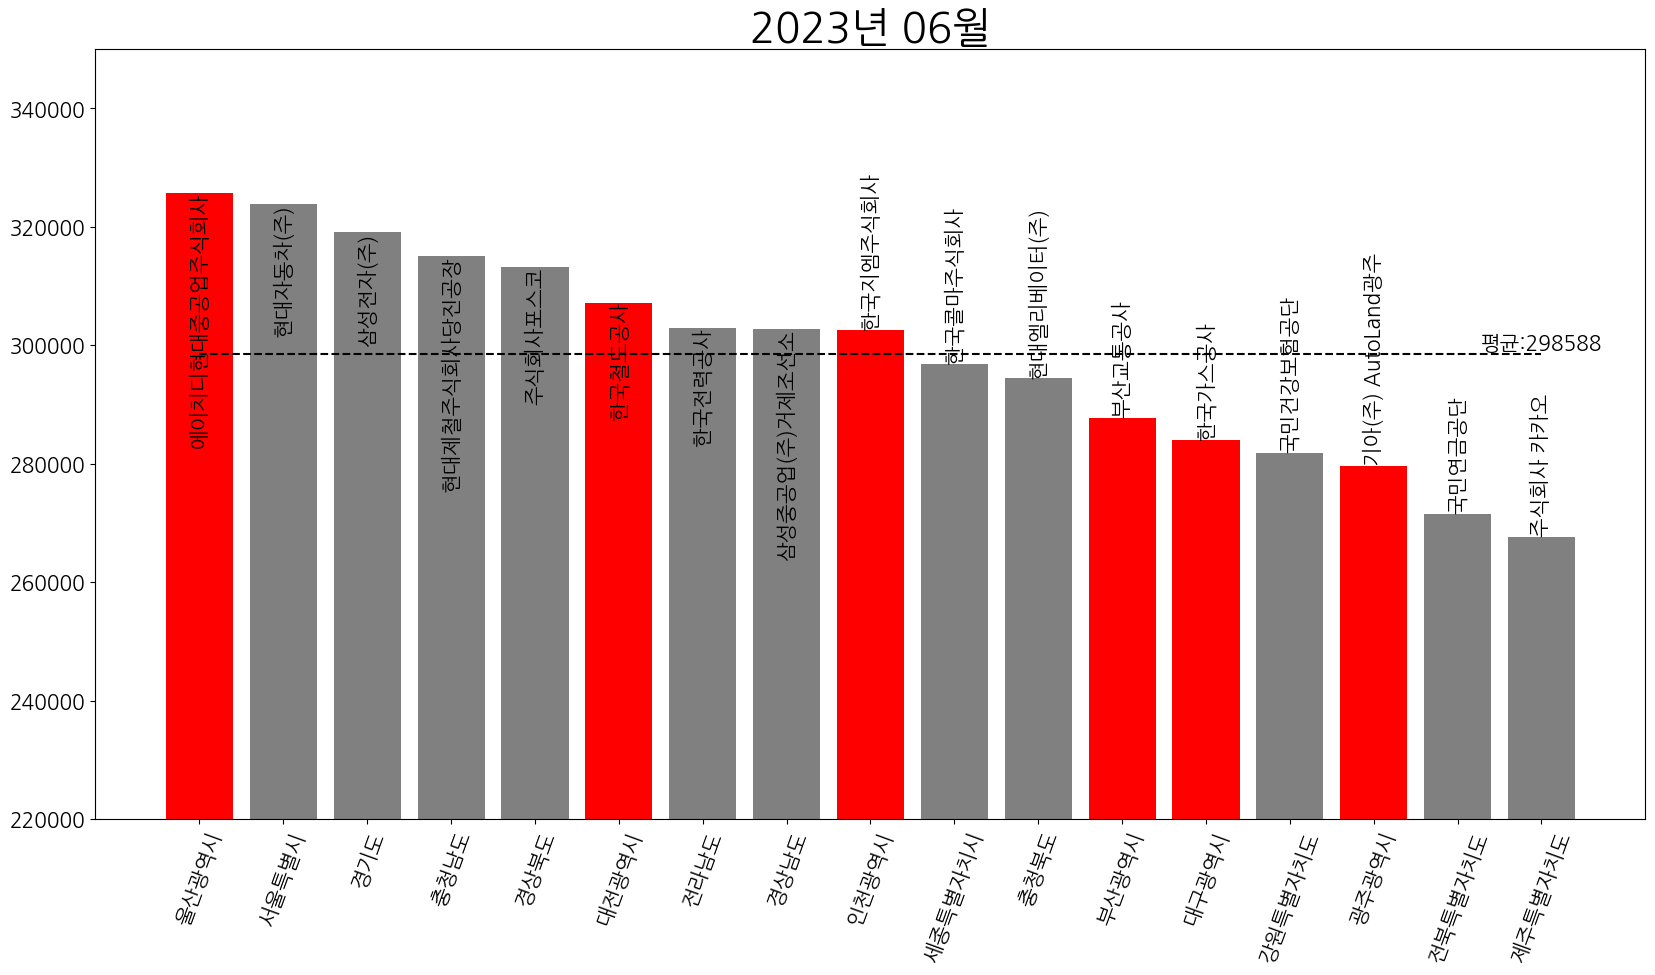

In [25]:
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()

plt.plot(x, [avg]*len(x), "k--")
bar = plt.bar(x, y, color = color)


plt.xticks(rotation=70)
plt.ylim(220000, 350000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

idx = 0

plt.title("2023년 06월", fontsize = "30")
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    if idx < 8:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
    else:    
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    idx += 1

plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)

plt.show()